# BlackJack

In [1]:
import gymnasium as gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

## Q-Learning

In [2]:
env = gym.make('Blackjack-v1')

action_space_size = env.action_space.n

num_episodes = 50000

learning_rate = 0.1
discount_rate = 0.95

epsilon_start = 1
epsilon_end = 0.001
decay_factor = (epsilon_end/epsilon_start)**(1/num_episodes)

In [3]:
def choose_action(q_table, state: tuple[int, int, bool]) -> int:
    if random.uniform(0,1) > epsilon:
        return (int(np.argmax(q_table[state])))
    else:
        return (env.action_space.sample())

In [4]:
q_table_Q = defaultdict(lambda: np.zeros(action_space_size))
rewards_list_Q = []
epsilon = epsilon_start

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    rewards_current_episode = 0
    
    while not done:       
        action = choose_action(q_table_Q, state)

        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        
        q_table_Q[state][action] = q_table_Q[state][action] + learning_rate*(reward + discount_rate*int(np.argmax(q_table_Q[new_state])) - q_table_Q[state][action])
        state = new_state
        rewards_current_episode += reward
        
        if done: break
            
    epsilon = epsilon*decay_factor
    rewards_list_Q.append(rewards_current_episode)  
env.close()

## SARSA

In [5]:
q_table_S = defaultdict(lambda: np.zeros(action_space_size))
rewards_list_S = []
epsilon = epsilon_start

for episode in range(num_episodes):
    state, info = env.reset()
    done = False
    rewards_current_episode = 0
    action = choose_action(q_table_S, state)
    
    while not done:
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        next_action = choose_action(q_table_S, new_state) 

        q_table_S[state][action] = q_table_S[state][action] + learning_rate*(reward + discount_rate*q_table_S[new_state][next_action] - q_table_S[state][action])
        state = new_state
        action = next_action
        
        rewards_current_episode += reward
            
    epsilon = epsilon*decay_factor
    rewards_list_S.append(rewards_current_episode) 
env.close()

## Results

In [6]:
print("Q-learning:")
rewards_list_Q = np.array(rewards_list_Q)
wins_Q = np.count_nonzero(rewards_list_Q == 1.0)
print("Win percentage: ", wins_Q/num_episodes)

losses_Q = np.count_nonzero(rewards_list_Q == -1.0)
print("Loss percentage: ", losses_Q/num_episodes)

average_reward_Q = rewards_list_Q.sum()/num_episodes
print("Average reward per game: ", average_reward_Q)

print("\nSARSA: ")
rewards_list_S = np.array(rewards_list_S)
wins_S = np.count_nonzero(rewards_list_S == 1.0)
print("Win percentage: ", wins_S/num_episodes)

losses_S = np.count_nonzero(rewards_list_S == -1.0)
print("Loss percentage: ", losses_S/num_episodes)

average_reward_S = rewards_list_S.sum()/num_episodes
print("Average reward per game: ", average_reward_S)

Q-learning:
Win percentage:  0.4067
Loss percentage:  0.51566
Average reward per game:  -0.10896

SARSA: 
Win percentage:  0.36336
Loss percentage:  0.56228
Average reward per game:  -0.19892


In [7]:
def moving_average(scores, window_size):
    moving_average = []
    i=0
    while i < len(scores) - window_size+1:
        window = scores[i: i+window_size]
        window_average = round(sum(window)/window_size, 2)
        moving_average.append(window_average)
        i += 1
    return moving_average     

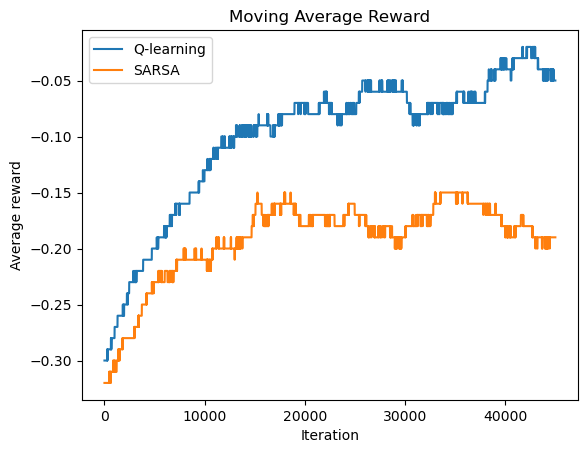

In [8]:
moving_average_Q = moving_average(rewards_list_Q, 5000)
moving_average_S = moving_average(rewards_list_S, 5000)

plt.plot(moving_average_Q)
plt.plot(moving_average_S)
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.title("Moving Average Reward")
plt.legend(['Q-learning', 'SARSA'])
plt.show()

In [9]:
def plot_policy(q_table, title, usable_ace):
    x = np.arange(10, 22)
    y = np.arange(1, 11)

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

    for i in range(len(x)):
        for j in range(len(y)):
            state = (x[i], y[j], usable_ace)
            actions = q_table[state]
            action = np.argmax(actions)
            if action:
                ax.text(j, i,'H', ha='center', va='center', fontsize=10, color='r')
            else:
                ax.text(j, i,'S', ha='center', va='center', fontsize=10, color='b')
            
        
    ax.set_xticks(np.arange(len(y)))
    ax.set_yticks(np.arange(len(x)))
    ax.set_xticklabels(y)
    ax.set_yticklabels(x)
    ax.set_xlabel("Dealer's face-up card")
    ax.set_ylabel("Player's current sum")
    ax.set_title(title)
    plt.show()

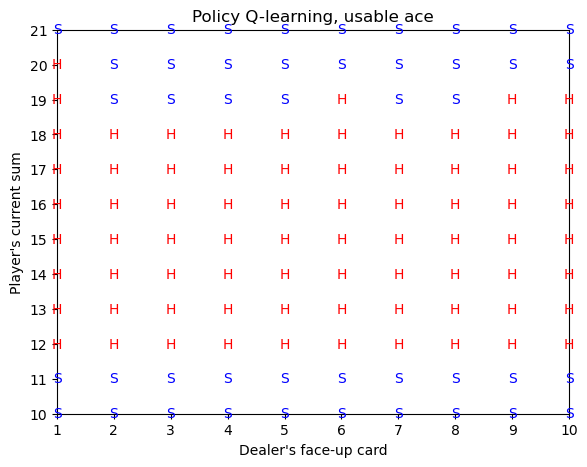

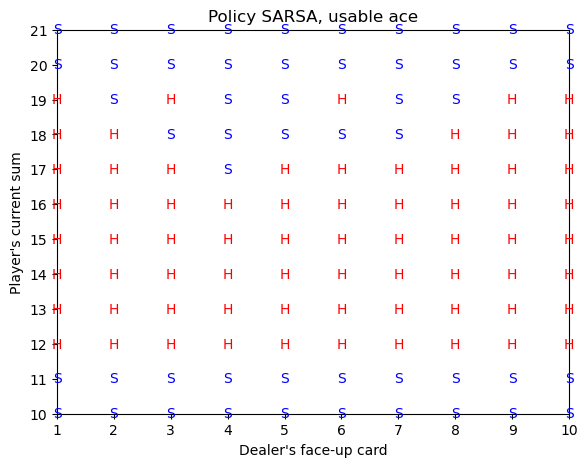

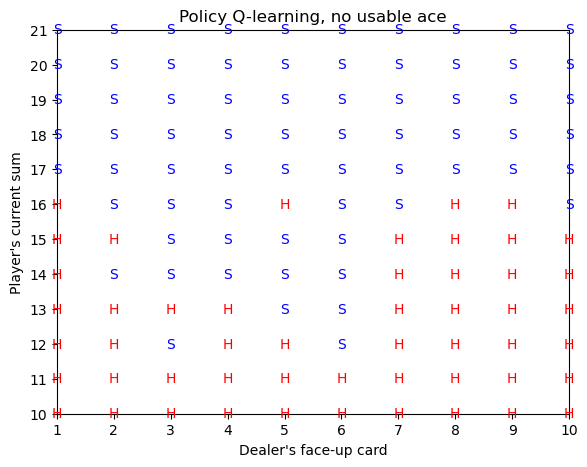

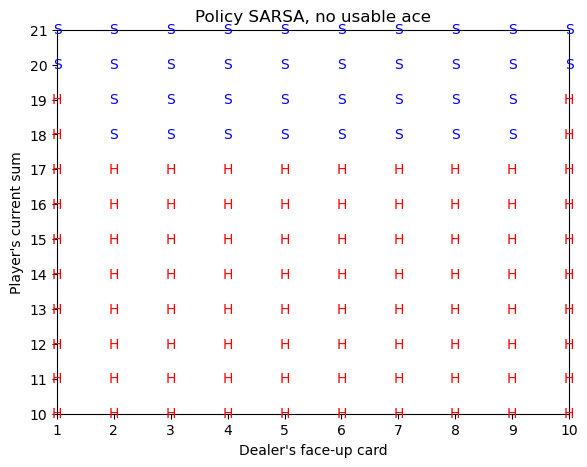

In [10]:
plot_policy(q_table_Q, "Policy Q-learning, usable ace", True)
plot_policy(q_table_S, "Policy SARSA, usable ace", True)
plot_policy(q_table_Q, "Policy Q-learning, no usable ace", False)
plot_policy(q_table_S, "Policy SARSA, no usable ace", False)